# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [101]:
#import required libraries
from sklearn.datasets import load_digits
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm

In [102]:
data = pd.read_csv('diabetes.csv')
data = data.to_numpy()
X = data[:,0:-1]
y = data[:,-1]

In [103]:
np.random.seed(0)
X_train, X_, y_train, y_ = train_test_split(X, y, test_size= 0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_,y_,test_size = 0.5,random_state=42)
y_val = y_val[:,np.newaxis]
y_test = y_test[:,np.newaxis]

In [104]:
K_list = [3,7,11,15,19,23,27,31,35,39]
score_list = []
for k in tqdm(range(len(K_list))):
    neigh = KNeighborsClassifier(n_neighbors=K_list[k])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_val)
    y_pred = y_pred[:,np.newaxis]
    score = float(sum(y_pred == y_val))/ float(len(y_val))
    score_list.append(score)

100%|██████████| 10/10 [00:00<00:00, 117.14it/s]


In [105]:
print("Best val accuracy:",np.max(score)*100)
print("Best K:",K_list[np.argmax(score_list)])

Best val accuracy: 72.72727272727273
Best K: 11


In [106]:
###Test set accuracy
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
y_pred = y_pred[:,np.newaxis]
score = float(sum(y_pred == y_test))/ float(len(y_test))
print("Test set accuracy for K=11:",score)

Test set accuracy for K=11: 0.7012987012987013


With increasing k, score increase, but dips after reaching a maxima 

## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



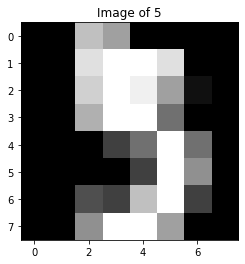

In [19]:
# Code here
np.random.seed(10)
digits = load_digits()
X = np.resize(digits.images,(len(digits.images),64))
Y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
plt.gray()
plt.title("Image of {}".format(digits.target[5]))
plt.imshow(digits.images[5])

In [22]:
prior_list = [GaussianNB(),BernoulliNB()]

for prior in prior_list:
    #Prior
    model = prior.fit(X_train,y_train)
    #testing accuracies
    y_pred = model.predict(X_test)
    #F1 score
    f1 = f1_score(y_test,y_pred,average="weighted")
    print("F1 score for {}\n{}".format(str(prior),f1))
    #Confusion matrix
    con_mat = confusion_matrix(y_test,y_pred)
    print("Confusion matrix for {}\n{}".format(str(prior),con_mat))

F1 score for GaussianNB()
0.8489770318561581
Confusion matrix for GaussianNB()
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]
F1 score for BernoulliNB()
0.8624817234502353
Confusion matrix for BernoulliNB()
[[31  0  0  0  2  0  0  0  0  0]
 [ 0 18  4  0  0  0  0  0  4  2]
 [ 0  1 29  2  0  0  0  0  1  0]
 [ 0  0  2 29  0  0  0  0  2  1]
 [ 0  0  0  0 45  0  0  1  0  0]
 [ 1  0  0  2  0 36  2  0  0  6]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  3  1  0  0  0  0  0 24  2]
 [ 0  1  0  1  2  1  0  3  1 31]]


Based on the F1 scores and confusion matrix we can say that BernoulliNB is better in this case

Summarize your findings and results here